# SHAP analysis

In [1]:
import joblib
from pathlib import Path
from omegaconf import OmegaConf

import pandas as pd
import shap
from sklearn.metrics import classification_report

In [2]:
EXPERIMENT_ROOT = "../../experiments/rf_features_only"
RESULTS = Path(EXPERIMENT_ROOT) / "results.yaml"

results = OmegaConf.load(RESULTS)

In [3]:
HAS_SCALER = False
DATA_ROOT = "../../data/prepared/"
MODEL = Path(EXPERIMENT_ROOT) / "model.pkl"
SCALER = Path(EXPERIMENT_ROOT) / "scaler.pkl"
VAL_DATA = Path(DATA_ROOT) / "val_features.pkl"
TEST_DATA = Path(DATA_ROOT) / "test_features.pkl"
VEC_COLS = list(range(768))

val_df = pd.read_pickle(VAL_DATA)
val_df_labels = val_df.retweet_label
val_df.drop(["retweet_label", "id_str"], axis=1, inplace=True)

test_df = pd.read_pickle(TEST_DATA)
test_df_labels = test_df.retweet_label
test_df.drop(["retweet_label", "id_str"], axis=1, inplace=True)

model = joblib.load(MODEL)

if HAS_SCALER:
    scaler = joblib.load(SCALER)
    transformed_val = scaler.transform(val_df[VEC_COLS].values)
    val_df[VEC_COLS] = transformed_val
    transformed_test = scaler.transform(test_df[VEC_COLS].values)
    test_df[VEC_COLS] = transformed_test

In [4]:
val_df.head()

entities.urls  entities.media  user_in_net  has_covid_keyword  \
173185              0               1            0                  0   
173186              0               1            0                  0   
173187              0               0            0                  0   
173188              0               1            0                  0   
173189              0               1            0                  0   

        tweets_keywords_3_in_degree  tweets_keywords_3_out_degree  \
173185                    -0.647823                     -0.510160   
173186                    -0.647823                     -0.651175   
173187                    -0.647823                     -0.510160   
173188                    -0.647823                     -0.651175   
173189                    -0.647823                     -0.651175   

        tweets_keywords_3_in_strength  tweets_keywords_3_out_strength  \
173185                      -0.967028                        0.944173   
173186                      -0.967028                       -0.954585   
173187                      -0.967028                        0.944173   
173188                      -0.967028                       -0.954585   
173189                      -0.967028                       -0.954585   

        tweets_keywords_3_eigenvector_in  tweets_keywords_3_eigenvector_out  \
173185                         -0.180504                          -0.054619   
173186                         -0.180504                          -0.054619   
173187                         -0.180504                          -0.054619   
173188                         -0.180504                          -0.054619   
173189                         -0.180504                          -0.054619   

        ...  users_reply_clustering  user.followers_isna  users_mention_isna  \
173185  ...               -0.797732                    0            0.595178   
173186  ...               -0.797732                    0            0.595178   
173187  ...               -0.797732                    0            0.595178   
173188  ...               -0.797732                    0            0.595178   
173189  ...               -0.797732                    0            0.595178   

        following_users_isna  users_reply_isna  log1p_num_hashtags  \
173185                     1          1.481133            1.098612   
173186                     1          1.481133            0.693147   
173187                     1          1.481133            0.000000   
173188                     1          1.481133            0.000000   
173189                     1          1.481133            0.000000   

        log1p_followers_count  log1p_friends_count  log1p_statuses_count  \
173185               0.762279             1.036245             -0.241881   
173186               0.762279             1.036245             -0.241881   
173187               0.762279             1.036245             -0.241881   
173188               0.762279             1.036245             -0.241881   
173189               0.762279             1.036245             -0.241881   

        log1p_num_mentioned  
173185                  0.0  
173186                  0.0  
173187                  0.0  
173188                  0.0  
173189                  0.0  

[5 rows x 49 columns]

In [5]:
test_df.head()

entities.urls  entities.media  user_in_net  has_covid_keyword  \
194715              1               1            1                  1   
194716              1               1            1                  0   
194717              1               1            1                  0   
194718              1               1            1                  1   
194719              1               0            1                  0   

        tweets_keywords_3_in_degree  tweets_keywords_3_out_degree  \
194715                     1.908895                      2.059462   
194716                    -0.106151                     -0.375587   
194717                    -0.310304                     -0.247161   
194718                    -0.206248                      1.744481   
194719                    -0.647823                     -0.651175   

        tweets_keywords_3_in_strength  tweets_keywords_3_out_strength  \
194715                       0.938154                        0.944173   
194716                       1.083082                        0.944173   
194717                       0.925793                        0.944173   
194718                       0.925793                        0.944173   
194719                      -0.967028                       -0.954585   

        tweets_keywords_3_eigenvector_in  tweets_keywords_3_eigenvector_out  \
194715                         -0.180504                          -0.054602   
194716                         -0.180504                          -0.054618   
194717                         -0.180504                          -0.054619   
194718                         -0.180504                          -0.054610   
194719                         -0.180504                          -0.054619   

        ...  users_reply_clustering  user.followers_isna  users_mention_isna  \
194715  ...                0.791296                    0            0.595178   
194716  ...                0.791296                    0            0.595178   
194717  ...                0.791296                    0            0.595178   
194718  ...                0.791296                    0            0.595178   
194719  ...                0.791296                    0            0.595178   

        following_users_isna  users_reply_isna  log1p_num_hashtags  \
194715                     0         -0.675159            0.693147   
194716                     0         -0.675159            0.000000   
194717                     0         -0.675159            0.000000   
194718                     0         -0.675159            0.693147   
194719                     0         -0.675159            0.693147   

        log1p_followers_count  log1p_friends_count  log1p_statuses_count  \
194715               1.203002             0.781949              0.956741   
194716               1.203002             0.781949              0.956741   
194717               1.203002             0.781949              0.956741   
194718               1.203002             0.781949              0.956741   
194719               1.203002             0.781949              0.956741   

        log1p_num_mentioned  
194715                  0.0  
194716                  0.0  
194717                  0.0  
194718                  0.0  
194719                  0.0  

[5 rows x 49 columns]

## Validation and test results

In [6]:
val_predictions = model.predict(val_df.values)
val_out = classification_report(val_df_labels.values, val_predictions,
                                digits=3, output_dict=False)
print(val_out)

              precision    recall  f1-score   support

           0      0.726     0.674     0.699     10954
           1      0.634     0.690     0.661      8989

    accuracy                          0.681     19943
   macro avg      0.680     0.682     0.680     19943
weighted avg      0.685     0.681     0.682     19943



[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.1s finished


In [7]:
test_predictions = model.predict(test_df.values)
test_out = classification_report(test_df_labels.values, test_predictions,
                                 digits=3, output_dict=False)
print(test_out)

              precision    recall  f1-score   support

           0      0.716     0.640     0.676     10639
           1      0.633     0.710     0.669      9305

    accuracy                          0.673     19944
   macro avg      0.675     0.675     0.673     19944
weighted avg      0.677     0.673     0.673     19944



[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.1s finished


## SHAP Explainer preparation and test data sampling

In [8]:
explainer = shap.Explainer(model)

In [9]:
len(test_df)

19944

In [10]:
# sample for faster SHAP calculation
# typically, 100-1000 examples is ok
test_df_sample = test_df.sample(frac=0.05, random_state=42)

In [11]:
test_df_labels_sample = test_df_labels[test_df_sample.index]

In [12]:
test_df_sample

entities.urls  entities.media  user_in_net  has_covid_keyword  \
196995              0               1            1                  0   
208764              0               1            0                  0   
198537              1               0            1                  1   
199457              0               0            1                  0   
204573              0               0            1                  0   
...               ...             ...          ...                ...   
213637              0               1            1                  0   
214221              1               0            1                  0   
212261              0               0            1                  0   
213929              0               0            1                  0   
198449              1               0            0                  0   

        tweets_keywords_3_in_degree  tweets_keywords_3_out_degree  \
196995                    -0.647823                     -0.651175   
208764                     0.639640                      1.776070   
198537                     0.171867                      1.041619   
199457                    -0.647823                     -0.651175   
204573                     2.409977                      2.188824   
...                             ...                           ...   
213637                     1.427123                      2.108751   
214221                    -0.206248                      1.888641   
212261                     0.257579                      2.372401   
213929                    -0.418476                     -0.510160   
198449                    -0.418476                     -0.651175   

        tweets_keywords_3_in_strength  tweets_keywords_3_out_strength  \
196995                      -0.967028                       -0.954585   
208764                       1.004117                        1.055509   
198537                       0.925793                        0.960493   
199457                      -0.967028                       -0.954585   
204573                       1.005758                        1.028141   
...                               ...                             ...   
213637                       1.037142                        1.027553   
214221                       1.174367                        1.064132   
212261                       0.925793                        0.990173   
213929                       0.925793                        0.944173   
198449                       0.925793                       -0.954585   

        tweets_keywords_3_eigenvector_in  tweets_keywords_3_eigenvector_out  \
196995                         -0.180504                          -0.054619   
208764                         -0.180504                          -0.054619   
198537                         -0.180504                          -0.054619   
199457                         -0.180504                          -0.054619   
204573                         -0.180504                          -0.054619   
...                                  ...                                ...   
213637                         -0.180504                           0.734861   
214221                         -0.180504                          -0.054109   
212261                         -0.180504                           0.226447   
213929                         -0.180504                          -0.054619   
198449                         -0.180504                          -0.054619   

        ...  users_reply_clustering  user.followers_isna  users_mention_isna  \
196995  ...                1.341809                    0            0.595178   
208764  ...               -0.797732                    0            0.595178   
198537  ...               -0.797732                    0           -1.680170   
199457  ...                1.103448                    0           -1.680170   
204573  ...               -0.797732                    0            0.595178

In [13]:
test_df_labels_sample

196995    1
208764    1
198537    0
199457    0
204573    0
         ..
213637    1
214221    1
212261    1
213929    1
198449    1
Name: retweet_label, Length: 997, dtype: int64

In [14]:
test_df_conf_sample = model.predict_proba(test_df_sample.values)
test_df_conf_sample

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.1s finished


array([[0.5306387 , 0.4693613 ],
       [0.39770972, 0.60229028],
       [0.77102733, 0.22897267],
       ...,
       [0.40260657, 0.59739343],
       [0.58668253, 0.41331747],
       [0.70577764, 0.29422236]])

In [15]:
shap_values = explainer(test_df_sample)

In [16]:
shap_values.base_values.shape

(997, 2)

In [17]:
shap_values.values.shape

(997, 49, 2)

In [18]:
shap_values.data.shape

(997, 49)

## SHAP values accross the test data

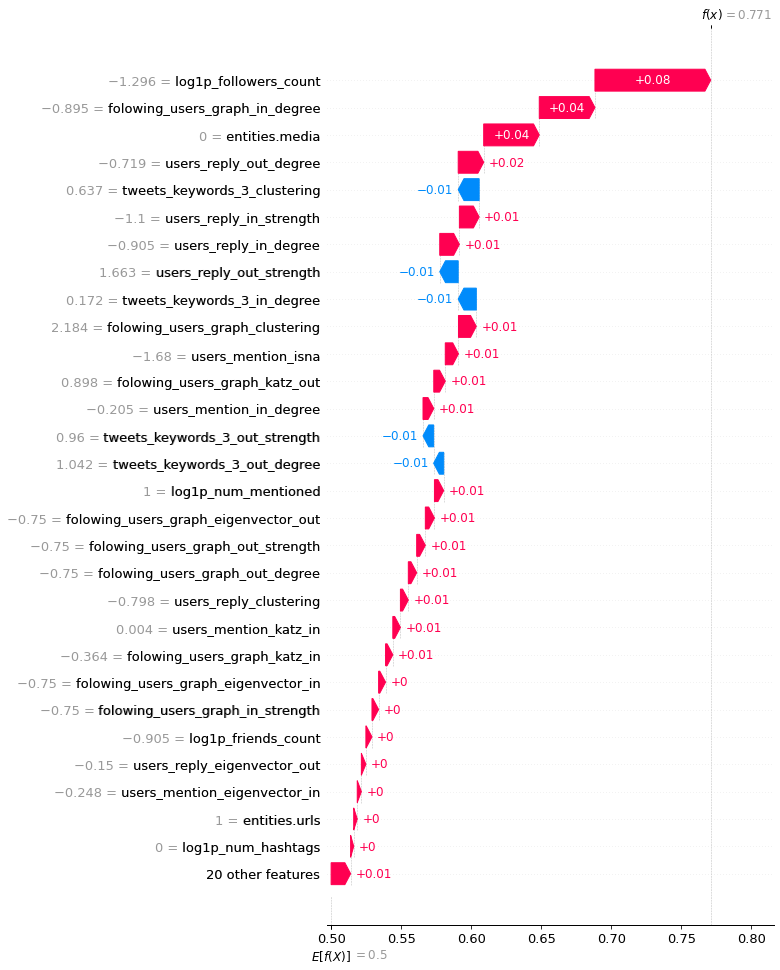

In [19]:
# visualize the prediction's explanation for class 0 for a confident correct prediction
# note idx 2 in test_df_conf_sample: 0.771 confidence
idx = 2
exp = shap.Explanation(shap_values.values[:, :, 0], shap_values.base_values[:, 0], shap_values.data, test_df_sample)
shap.plots.waterfall(exp[idx], max_display=30)

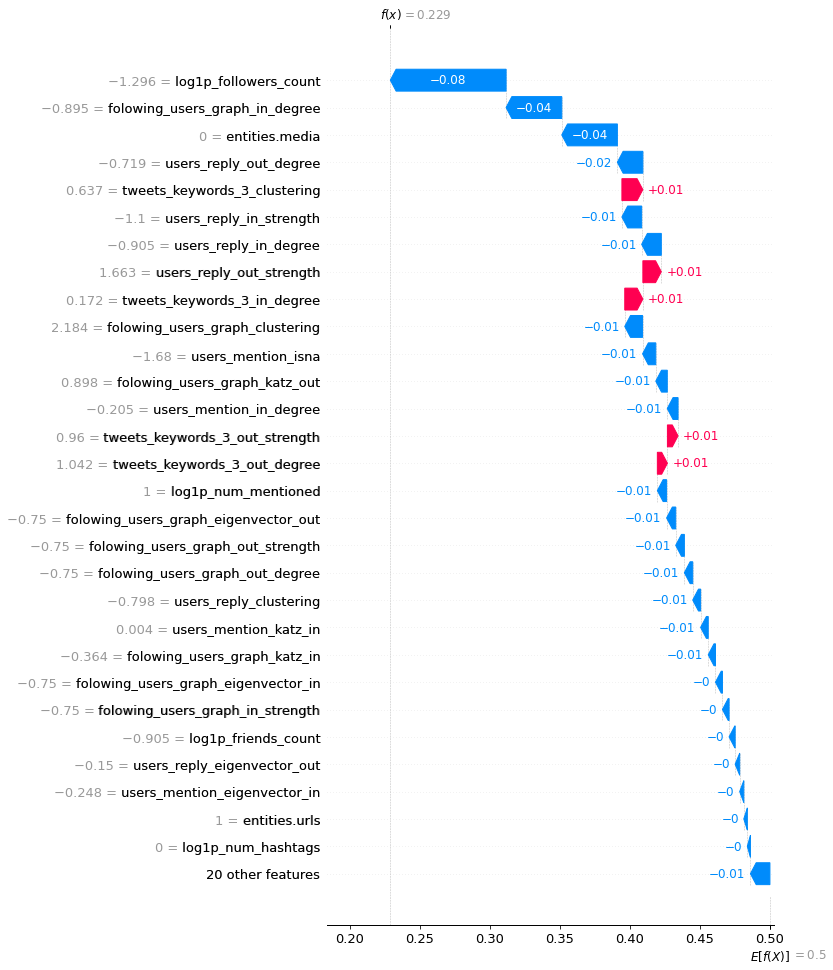

In [20]:
# visualize the prediction's explanation for class 1 as a check (symmetric chart)
idx = 2  # the same example
exp = shap.Explanation(shap_values.values[:, :, 1], shap_values.base_values[:, 1], shap_values.data, test_df_sample)
shap.plots.waterfall(exp[idx], max_display=30)

In [21]:
# the same plot for class 1, but horizontal display
idx = 2
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values.values[idx, :, 1], test_df_sample.iloc[idx, :])

In [22]:
# Vizualize multiple predictions (class 1)
# It is possible to explore different variables interactively in the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values.values[:, :, 1], test_df_sample)

## Feature importance

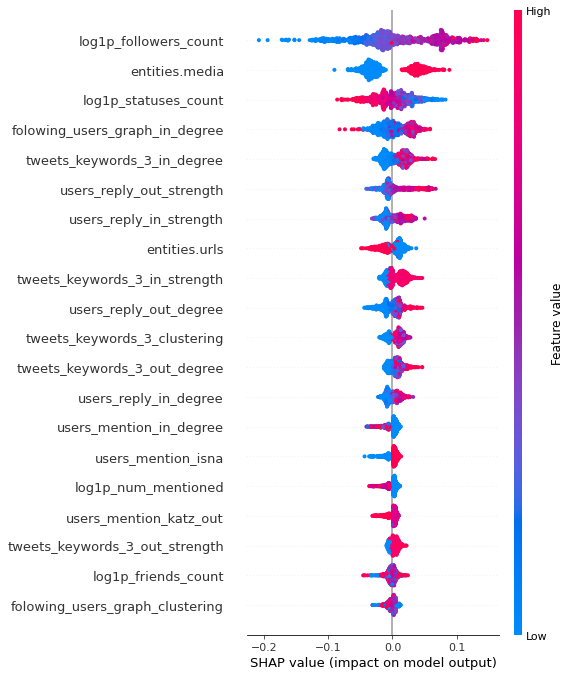

In [23]:
# influence on class 1
shap.summary_plot(shap_values.values[:, :, 1], test_df_sample, plot_type='dot')

## Feature importance and correlation

In [24]:
clust = shap.utils.hclust(test_df_sample, test_df_labels_sample, linkage="single")

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
No/low signal found from feature 2 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 3 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
 84%|████████▎ | 41/49 [00:11<00:03,  2.35it/s]No/low signal found from feature 40 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 41 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 42 (this is typically caused by constant or n

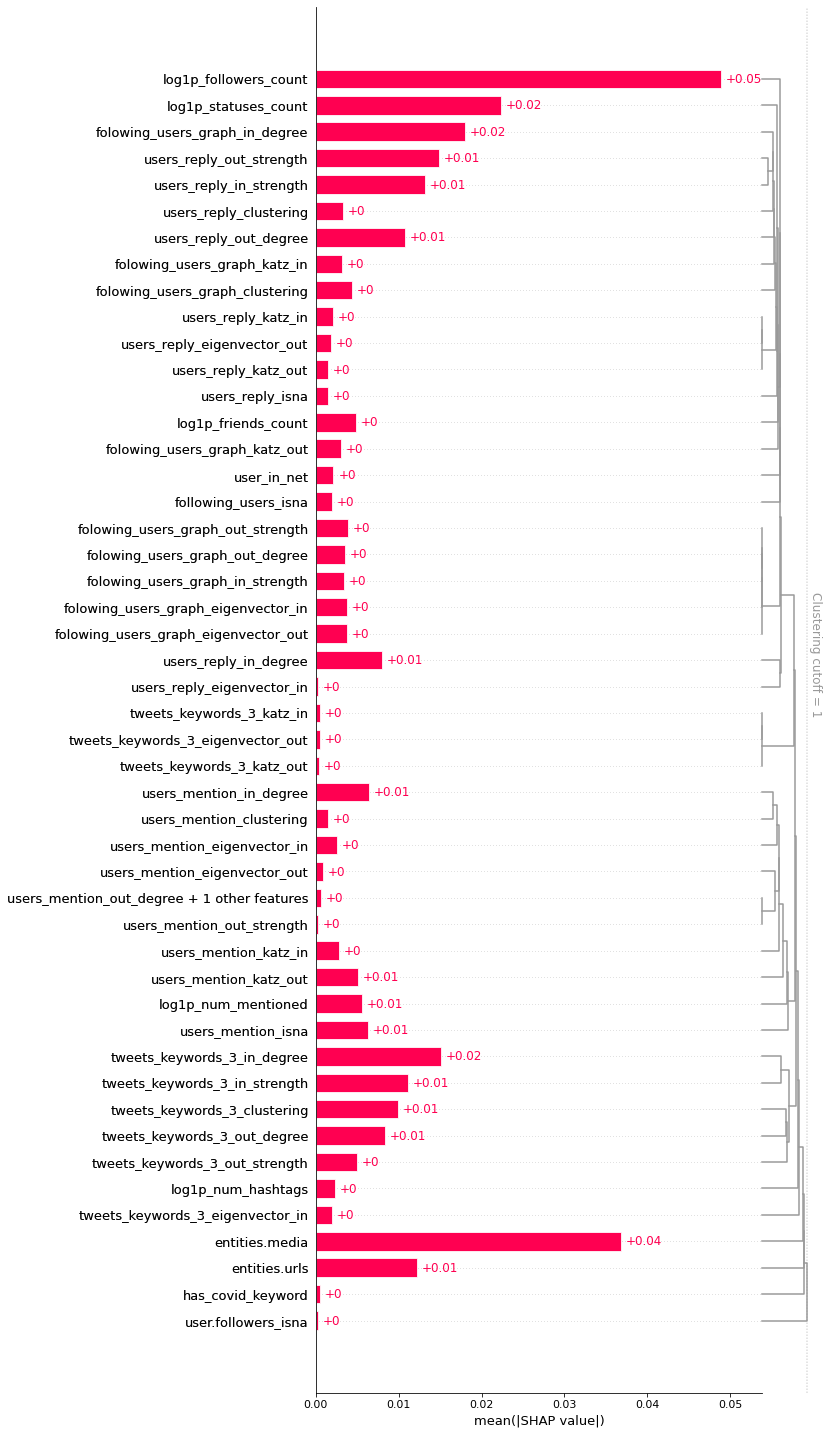

In [25]:
exp = shap.Explanation(shap_values.values[:, :, 1], shap_values.base_values[:, 1], shap_values.data, test_df_sample, feature_names=test_df_sample.columns)
shap.plots.bar(exp, max_display=48, clustering=clust, clustering_cutoff=1)

## SHAP dependence plots

"SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions."

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20LightGBM.html

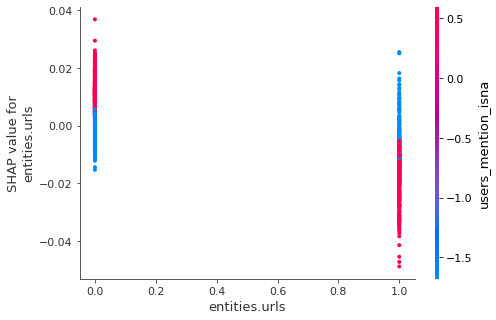

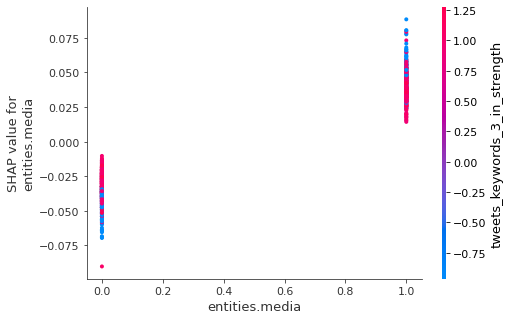

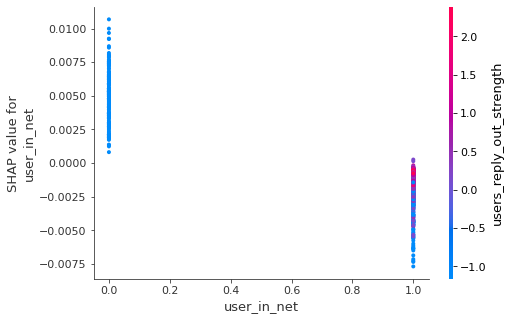

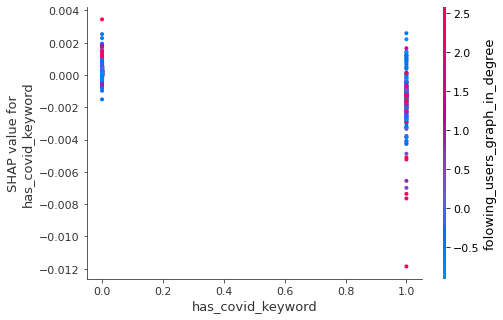

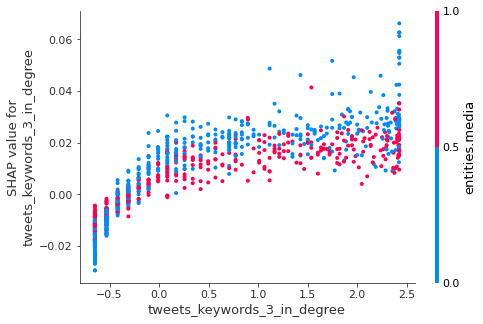

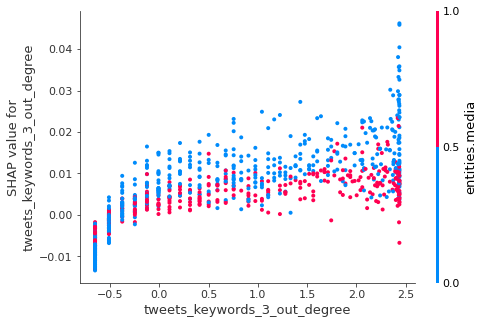

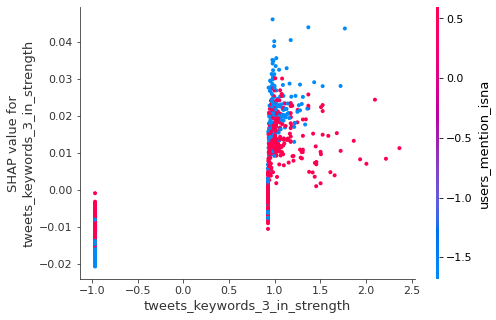

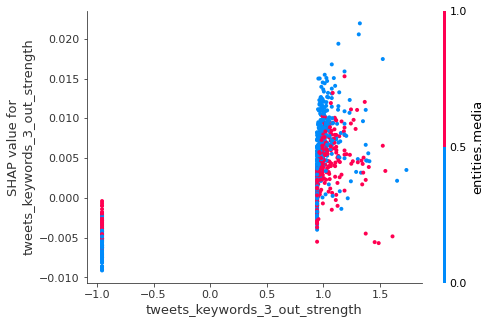

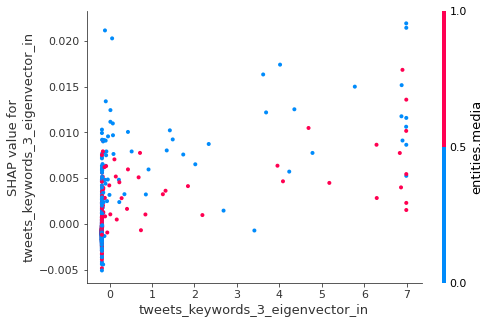

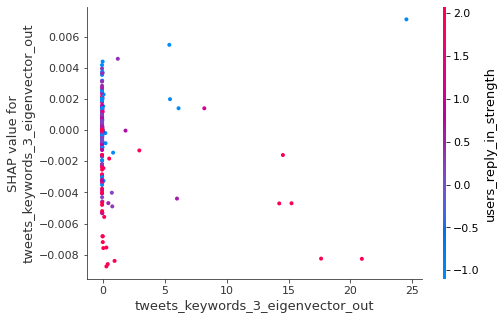

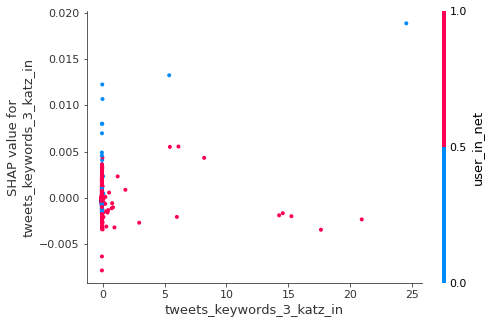

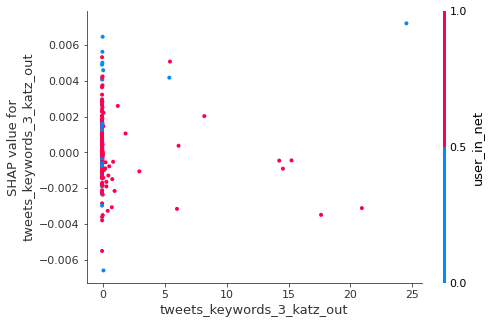

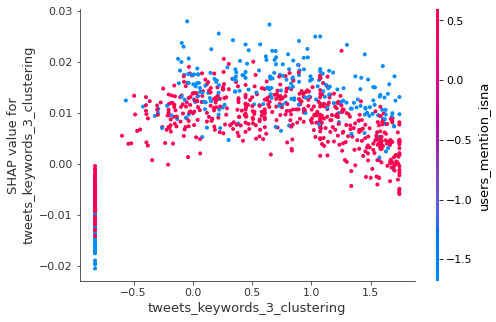

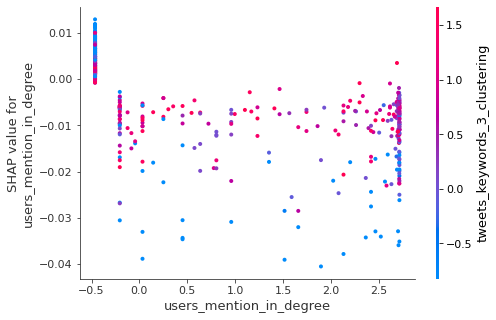

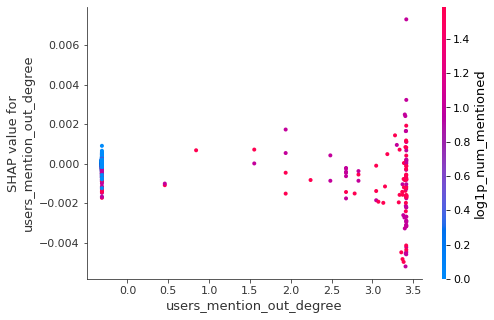

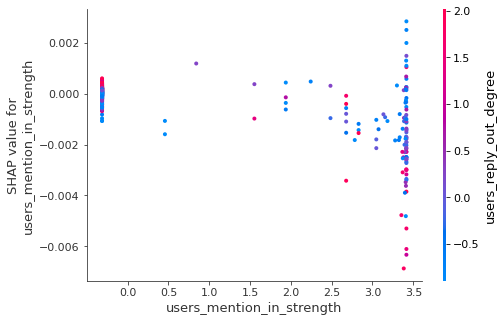

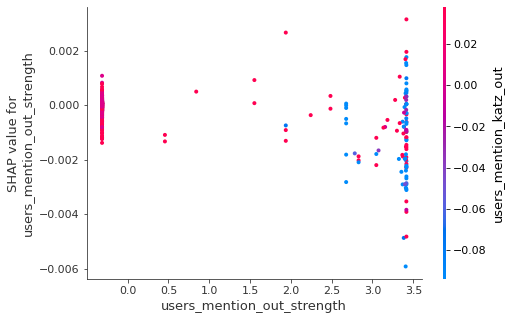

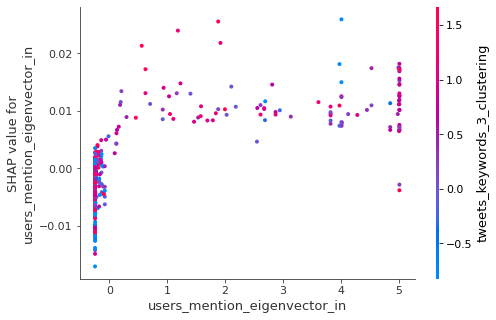

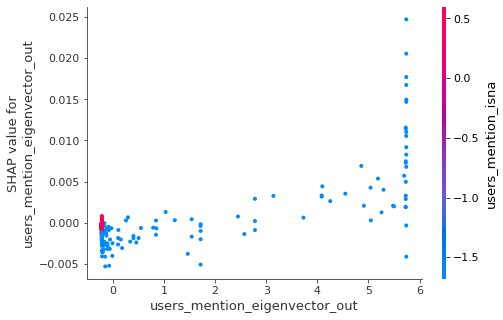

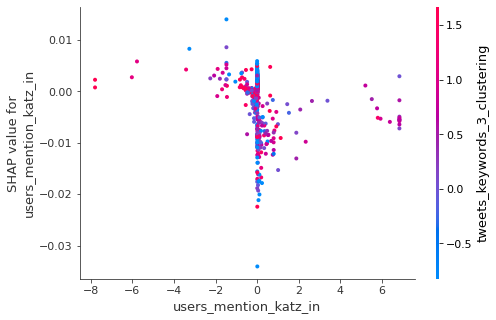

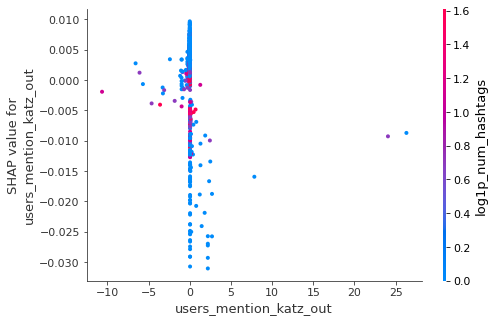

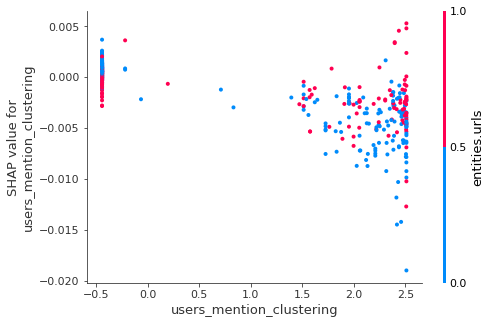

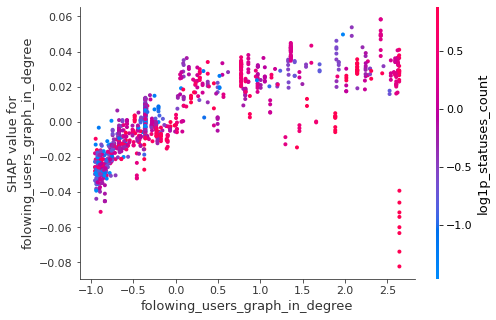

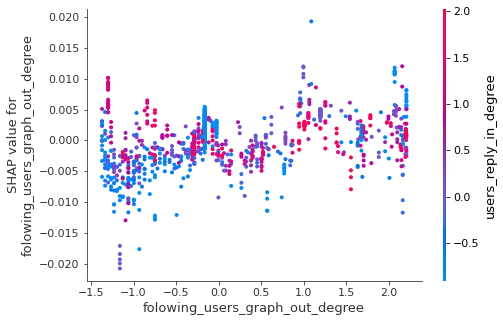

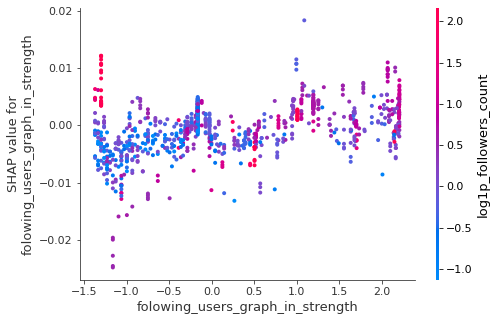

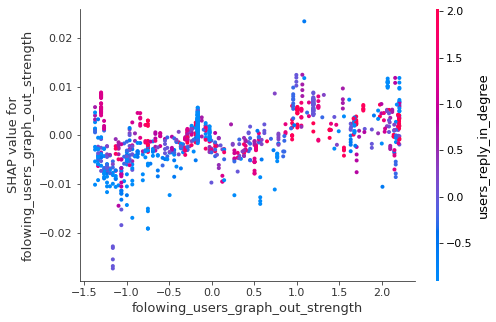

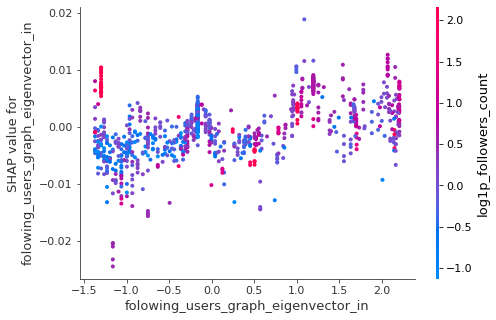

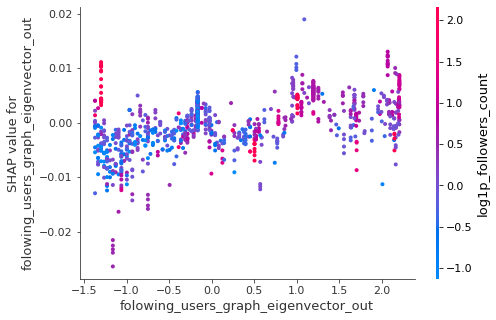

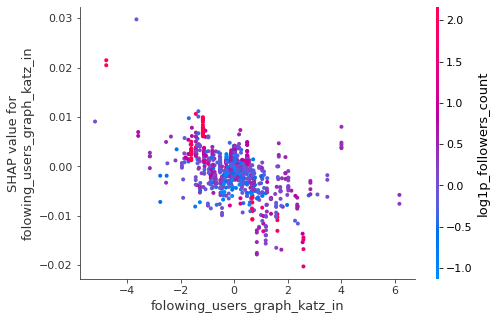

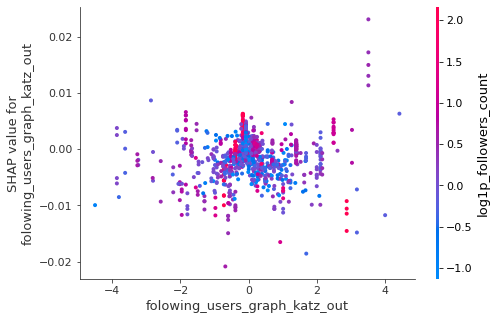

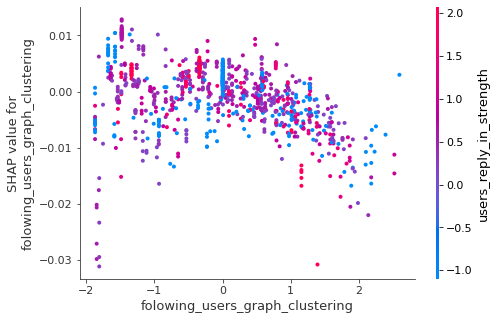

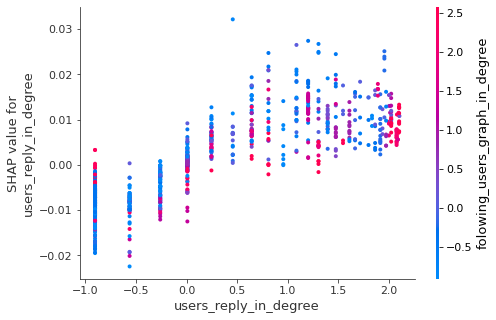

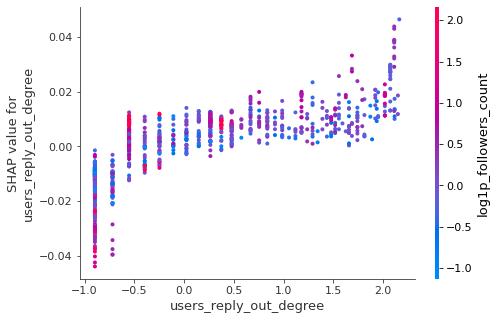

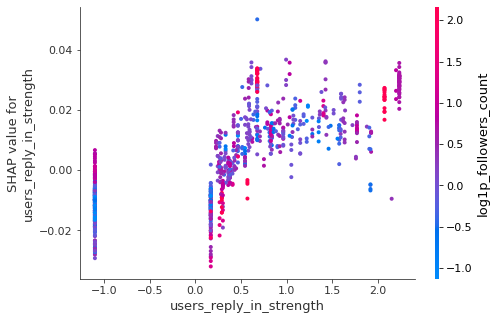

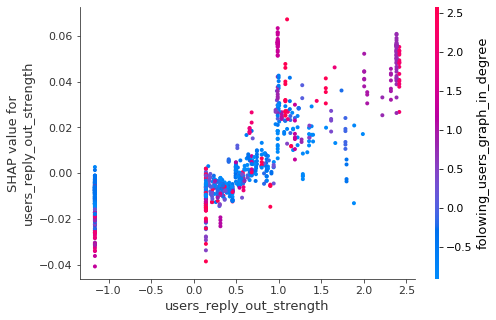

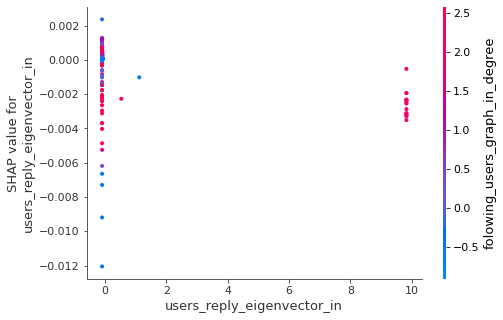

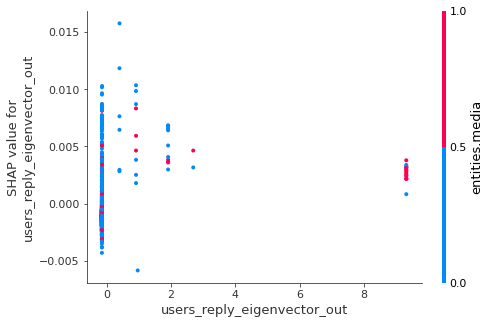

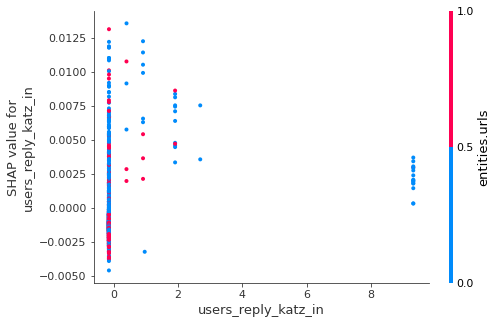

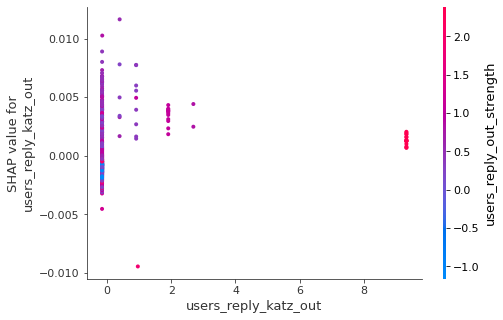

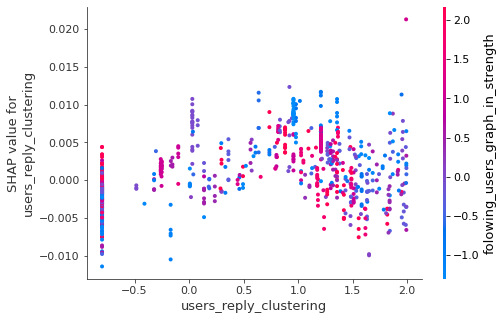

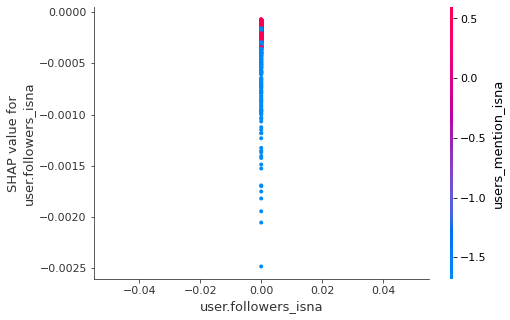

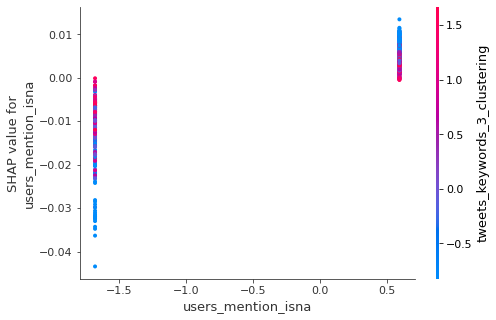

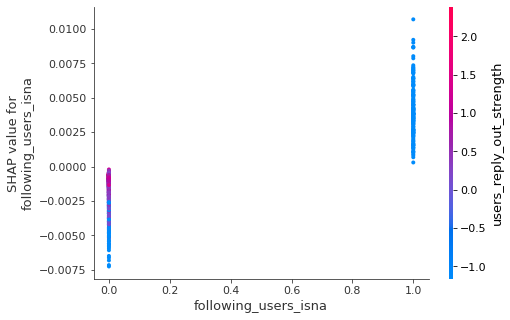

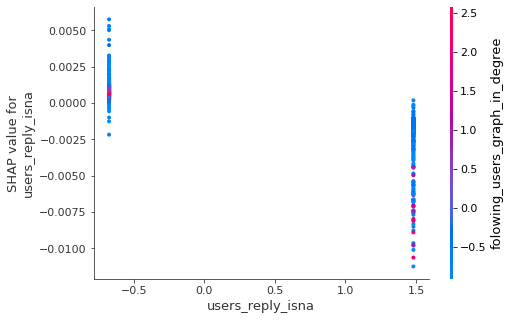

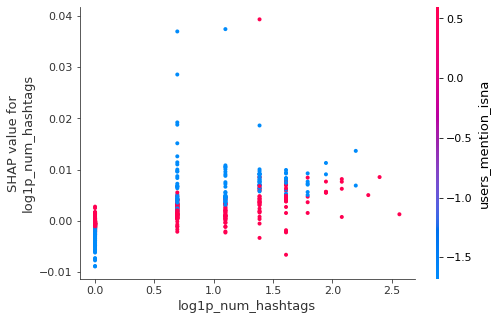

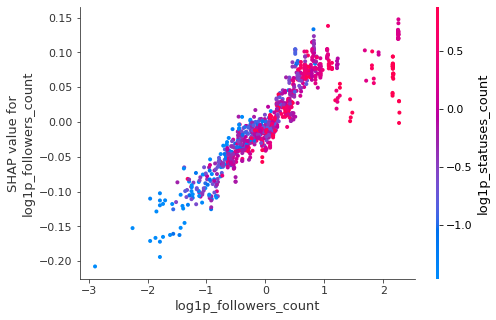

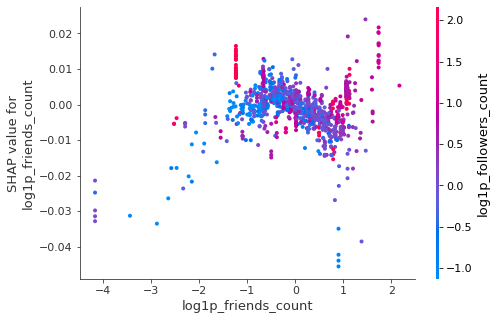

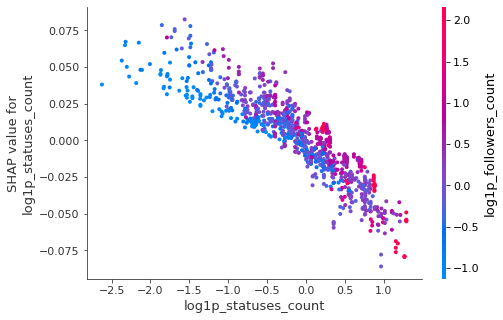

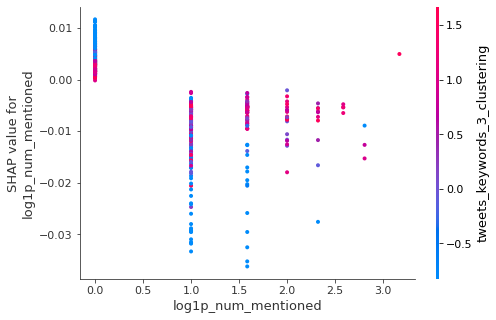

In [26]:
for name in test_df_sample.columns:
    shap.dependence_plot(name, shap_values.values[:, :, 1], test_df_sample, display_features=test_df_sample)